# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Stats and distributions
import scipy.stats as stats

# LR
import statsmodels.api as sm

# Plotting +
import seaborn as sns

# Distance functions
from haversine import haversine

# Test train functions
from sklearn.model_selection import train_test_split

# Data Cleaning

### Import the data

In [2]:
df = pd.read_csv('kc_house_data.csv')

Based on our earlier exploratory data analysis we will perform the following data cleaning tasks.

#### 1. `waterfront`

There are some `NaN`s, we will encode them to `0` to be consistent with the rest of the data. We believe that `0` indicates the home is not on waterfront.

Before:

In [3]:
df['waterfront'].unique()

array([nan,  0.,  1.])

Cleaning:

In [4]:
df['waterfront'].replace(np.nan, 0, inplace=True)

After:

In [5]:
df['waterfront'].unique()

array([0., 1.])

#### 2. `view`

There are some `NaN`s, we will encode them to `0` to be consistent with the rest of the data. We don't know the actually scale of the 'scores', but think it's most likely they should be `0`.

Before:

In [6]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Cleaning:

In [7]:
df['view'].replace(np.nan, 0, inplace=True)

After:

In [8]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

#### 3. `sqft_basement`

There are rows where the value equals `?`, which caused the column to be coerced to `object`. We will assume (and spot checked to be true) that:  
`sqft_basement = sqft_totliving - sqft_above`  

We will replace all values of that column with this calculation so that they are all consistent.

Before:

In [9]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Cleaning:

In [10]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

After:

In [11]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [12]:
df['sqft_basement'].dtype

dtype('int64')

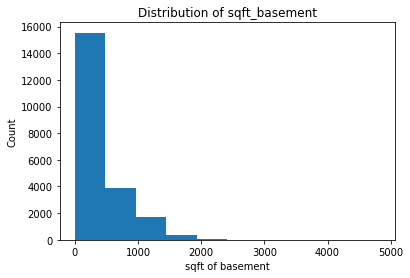

In [13]:
fig, ax = plt.subplots()

ax.hist(df['sqft_basement'])
ax.set_title('Distribution of sqft_basement')
ax.set_ylabel('Count')
ax.set_xlabel('sqft of basement')
plt.show()

#### 4. `yr_renovated`

There are a large number of nulls. We believe that it means that the house has not been renovated yet. There are also a large number with 0 entered, which we believe means the same thing. So for consistency of data we will transform the nulls all into 0s.


Before:

In [14]:
df.loc[df['yr_renovated'].isna() == True,['yr_renovated']].shape[0]

3842

There are 3.8k nulls.

Cleaning:

In [15]:
df['yr_renovated'].replace(np.nan, 0.0, inplace=True)

After:

In [16]:
df.loc[df['yr_renovated'].isna() == True,['yr_renovated']].shape[0]

0

No nulls!

#### 5. `zipcode`

The data was coerced into `int`. In practice zipcodes are more categorical in nature. So in anticpation of applying them as such we will convert them to `str`.


Before:

In [17]:
df['zipcode'].dtype

dtype('int64')

Cleaning:

In [18]:
df['zipcode'] = df['zipcode'].apply(str)

After:

In [19]:
df['zipcode'].dtype

dtype('O')

Let's take at our dataset up to this point:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Confirming that we have no nulls.

##### 6. `date` 

Now let us add a datetime column; it may come in handy later.

Converting:

In [21]:
df['date_formatted'] = pd.to_datetime(df['date'])

Checking:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null object
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
date_formatted    21597 non-null datetime64[ns]
dtypes

Let's look at a few rows:

In [23]:
df.loc[:,['date','date_formatted']].head()

date date_formatted
0  10/13/2014     2014-10-13
1   12/9/2014     2014-12-09
2   2/25/2015     2015-02-25
3   12/9/2014     2014-12-09
4   2/18/2015     2015-02-18

In [24]:
df.loc[:,['date','date_formatted']].tail(10)

date date_formatted
21587   8/25/2014     2014-08-25
21588   1/26/2015     2015-01-26
21589  10/14/2014     2014-10-14
21590   3/26/2015     2015-03-26
21591   2/19/2015     2015-02-19
21592   5/21/2014     2014-05-21
21593   2/23/2015     2015-02-23
21594   6/23/2014     2014-06-23
21595   1/16/2015     2015-01-16
21596  10/15/2014     2014-10-15

Looks good.

#### Should we consider binarizing `zipcode`?

Since we consider `zipcode` to be categorical, we should binarize it.

In [25]:
zipcode_binarized = pd.get_dummies(df['zipcode'])

In [26]:
zipcode_binarized.head()


98001  98002  98003  98004  98005  98006  98007  98008  98010  98011  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   ...    98146  98148  98155  98166  98168  98177  98178  98188  98198  98199  
0  ...        0      0      0      0      0      0      1      0      0      0  
1  ...        0      0      0      0      0      0      0      0      0      0  
2  ...        0      0      0      0      0      0      0      0      0      0  
3  ...        0      0      0      0      0      0      0      0      0      0  
4  ...        0      0      0      0      0      0      0      0      0      0  

[5 rows x 70 columns]

In [27]:
zipcode_binarized.shape

(21597, 70)

This is as we expected.

----

We have performed all our preliminary cleansing. Now we will combine and clean into one dataset for exploring multicollinearity.

Append binarized zip codes:

In [28]:
df_m = pd.concat([df, zipcode_binarized], axis=1)

In [29]:
df_m.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...    98146  98148  98155  98166  \
0      5650     1.0         0.0   0.0  ...        0      0      0      0   
1      7242     2.0         0.0   0.0  ...        0      0      0      0   
2     10000     1.0         0.0   0.0  ...        0      0      0      0   
3      5000     1.0         0.0   0.0  ...        0      0      0      0   
4      8080     1.0         0.0   0.0  ...        0      0      0      0   

   98168  98177 98178  98188  98198  98199  
0      0      0     1      0      0      0  
1      0      0     0      0      0      0  
2      0      0     0      0      0      0  
3      0      0     0      0      0      0  
4      0      0     0      0      0      0  

[5 rows x 92 columns]

Spot check that `zipcode` and its related binarized columns agree. 

For example, `98146':

In [30]:
df_m.loc[df_m['zipcode']=='98146',['zipcode','98146']].head()

zipcode  98146
8     98146      1
160   98146      1
217   98146      1
225   98146      1
324   98146      1

Looks good! Let's check one more, `98105`:

In [31]:
df_m.loc[df_m['zipcode']=='98105',['zipcode','98105']].head()

zipcode  98105
54    98105      1
55    98105      1
211   98105      1
308   98105      1
330   98105      1

Also, before we used the binarized `zipcodes` we should drop one. We will 'arbitrarily' select one.

In [32]:
df_m.drop(['98107'], axis=1, inplace=True)

Additionally, we can now drop `zipcode`.

In [33]:
df_m.drop(['zipcode'], axis=1, inplace=True)

In [34]:
#Check
df_m.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'date_formatted', '98001',
       '98002', '98003', '98004', '98005', '98006', '98007', '98008', '98010',
       '98011', '98014', '98019', '98022', '98023', '98024', '98027', '98028',
       '98029', '98030', '98031', '98032', '98033', '98034', '98038', '98039',
       '98040', '98042', '98045', '98052', '98053', '98055', '98056', '98058',
       '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
       '98102', '98103', '98105', '98106', '98108', '98109', '98112', '98115',
       '98116', '98117', '98118', '98119', '98122', '98125', '98126', '98133',
       '98136', '98144', '98146', '98148', '98155', '98166', '98168', '98177',
       '98178', '98188', '98198', '98199'],
      dtype='object')

Let's drop `date` since we have a nicely-formatted version of it now!

In [35]:
df_m.drop(['date'], axis=1, inplace=True)

In [36]:
#Check
df_m.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date_formatted', '98001', '98002',
       '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98103', '98105', '98106', '98108', '98109', '98112', '98115', '98116',
       '98117', '98118', '98119', '98122', '98125', '98126', '98133', '98136',
       '98144', '98146', '98148', '98155', '98166', '98168', '98177', '98178',
       '98188', '98198', '98199'],
      dtype='object')

We've completed all our identified cleaning opportunities for now. However, we may identify other issues as we continue with our analysis. For our we will move on to analyzing our potential predictors for multicollinearity. 

----

# Multicollinearity Analysis

In [37]:
selected = [col for col in df_m.columns]
selected = selected[2:]
selected

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199']

In [38]:
df_m = df_m.loc[:,selected]

In [39]:
selected = selected[2:]

In [40]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 87 columns):
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
date_formatted    21597 non-null datetime64[ns]
98001             21597 non-null uint8
98002             21597 non-null uint8
98003             21597 non-null uint8
98004             21597 non-null uint8
98005     

In [41]:
df_m.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront    -0.002127   0.063629     0.104637  0.021459  0.020797   
view           0.078354   0.186016     0.281715  0.075054  0.028414   
condition      0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.302808   0.283440     0.435130  0.015418 -0.245715   
yr_built       0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated   0.017900   0.047177     0.051060  0.004979  0.003793   
lat           -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.030690   0.088303     0.184342  0.718204 -0.010722   
98001          0.002837  -0.017643    -0.025071 -0.000417 -0.015305   
98002         -0.004848  -0.034692    -0.047539 -0.017656 -0.028578   
98003         -0.001987  -0.010210    -0.018905 -0.012444 -0.038944   
98004          0.063470   0.065358     0.110169 -0.005880 -0.014004   
98005          0.045691   0.035497     0.055598  0.010326 -0.035166   
98006          0.077650   0.087887     0.135207 -0.006366 -0.009752   
98007          0.038718   0.006107     0.008983 -0.008685 -0.012430   
98008          0.045006  -0.004119     0.006668 -0.013665 -0.066642   
98010         -0.006126  -0.007834     0.004254  0.066482 -0.001782   
98011          0.018087   0.020156     0.017963 -0.008725  0.001498   
98014         -0.030617  -0.006665     0.003116  0.150111  0.001399   
98019         -0.001021   0.021436     0.009362  0.056280  0.039620   
98022         -0.024173  -0.026805    -0.027642  0.149126 -0.032909   
...                 ...        ...          ...       ...       ...   
98077          0.025231   0.043792     0.081380  0.092284  0.026258   
98092          0.017793   0.020760     0.016148  0.053991  0.026173   
98102         -0.009252   0.015182     0.005359 -0.019308  0.063970   
98103         -0.057292  -0.039863    -0.079216 -0.047502  0.104531   
98105          0.023200   0.005865     0.007922 -0.024944  0.018723   
98106         -0.036820  -0.050823    -0.080999 -0.028932 -0.026052   
98108         -0.016995  -0.022348    -0.038141 -0.022270 -0.020337   
98109         -0.013882   0.003930    -0.001981 -0.019741  0.031048   
98112          0.016501   0.037648     0.051184 -0.027415  0.065051   
98115         -0.030405  -0.053976    -0.044454 -0.038835 -0.022795   
98116         -0.041223  -0.020849    -0.030793 -0.030441  0.008008   
98117         -0.061832  -0.063873    -0.068559 -0.040957 -0.010991   
98118         -0.040349  -0.070680    -0.066036 -0.034892 -0.043354   
98119         -0.011242   0.013062    -0.007543 -0.025707  0.051424   
98122         -0.026158  -0.007763    -0.037521 -0.032653  0.060911   
98125         -0.024439  -0.053507    -0.050552 -0.024866 -0.031212   
98126         -0.074845  -0.073387    -0.075468 -0.031125 -0.034401   
98133         -0.038821  -0.075635    -0.077506 -0.029544 -0.027339   
98136         -0.052938  -0.036214    -0.042750 -0.024444 -0.003870   
98144         -0.021195  -0.011188    -0.023275 -0.033762  0.037763   
98146         -0.031151  -0.072893    -0.058106 -0.017066 -0.058567   
98148         -0.012931  -0.021539    -0.026323 -0.007625 -0.027030   
98155         -0.007890  -0.056804    -0.046455 -0.016883 -0.074127   
98166          0.000560  -0.028999    -0.001475 -0.003925 -0.049343   
98168         -0.045699  -0.099712    -

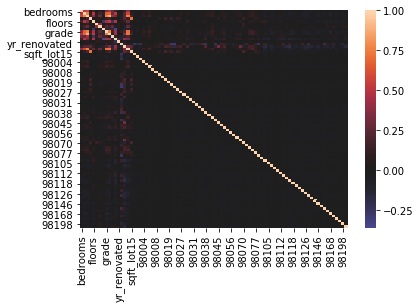

In [42]:
sns.heatmap(df_m.corr(), center=0);

Wow, that's alot of variables. Let's simplify by just looking without the binarized `zipcode`s for now.

In [43]:
df_m_small = df_m.iloc[:,0:18]

In [44]:
df_m_small.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date_formatted'],
      dtype='object')

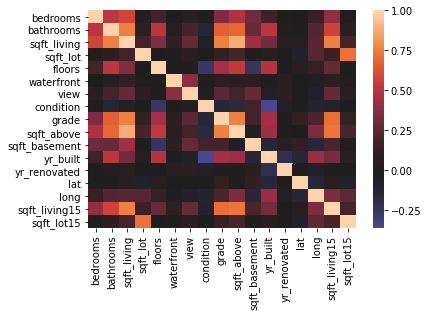

In [45]:
#Observe smaller dataset
sns.heatmap(df_m_small.corr(), center=0);

Let's also use the rule of thumb of correlations > .75 (absolute value)

Based on inspection of these results, if any of the variables are to be removed, we would remove `sqft_living` since it is highly correlated with a number of other variables, such as `bathrooms`, `grade`, `sqft_above` and `sqft_living15`.

In [46]:
# Create candidate dataframe
df_predictors = df_m.drop(['sqft_living'], axis=1)
df_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date_formatted', '98001', '98002', '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98108',
       '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

----

# Feature Scaling and Normalization

Next, we will go through the variables and determine if they need further scaling or normalization.

In [47]:
# Here's Werlindo's columns
w_cols = [col for col in df_predictors.columns][0:8]
w_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade']

#### 1. `bedrooms`

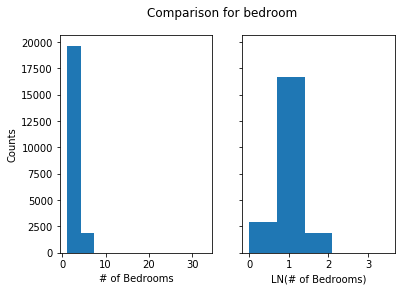

In [48]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['bedrooms'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Bedrooms")

# Second plot - log transformation
ax[1].hist(df_predictors['bedrooms'].apply(np.log), bins = 5)
ax[1].set_xlabel("LN(# of Bedrooms)")

plt.suptitle("Comparison for bedroom")
plt.show()

In [49]:
df_predictors['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Yes, let's take the log.

#### 2 . `bathrooms`

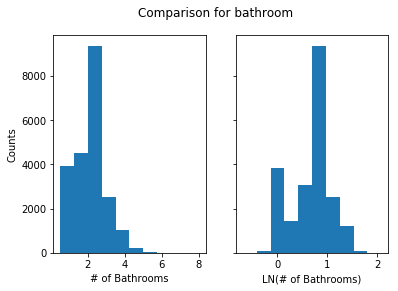

In [50]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['bathrooms'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Bathrooms")

# Second plot - log transformation
ax[1].hist(df_predictors['bathrooms'].apply(np.log))
ax[1].set_xlabel("LN(# of Bathrooms)")

plt.suptitle("Comparison for bathroom")
plt.show()

In [51]:
df_predictors['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Yes, let's take the log.

#### 3. `sqft_lot`

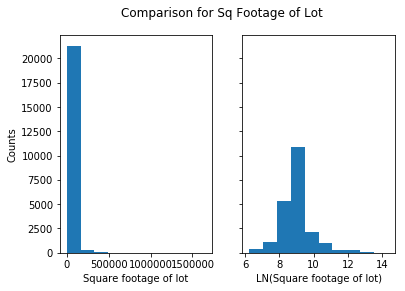

In [52]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['sqft_lot'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square footage of lot")

# Second plot - log transformation
ax[1].hist(df_predictors['sqft_lot'].apply(np.log))
ax[1].set_xlabel("LN(Square footage of lot)")

plt.suptitle("Comparison for Sq Footage of Lot")
plt.show()

Yes, let's take the log.

#### 4. `floors`

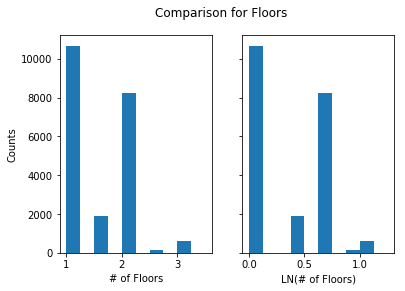

In [53]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['floors'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Floors")

# Second plot - log transformation
ax[1].hist(df_predictors['floors'].apply(np.log))
ax[1].set_xlabel("LN(# of Floors)")

plt.suptitle("Comparison for Floors")
plt.show()

In [54]:
df_predictors['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Anecdotally, it's rare for a house to have more than 2 to 3 floors. So log transforming didn't do much. Might consider maybe making it `categorical`?

#### 5. `waterfront`

We forgot that `waterfront` is essentially a binary/categorical variable. So we will need to binarize it.

#### 6. `view`

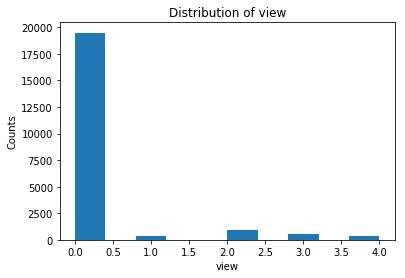

In [55]:
fig, ax = plt.subplots(1,1,sharey=True)

# First plot - no transformation
ax.hist(df_predictors['view'])
ax.set_ylabel("Counts")
ax.set_xlabel("view")
ax.set_title("Distribution of view")
plt.show()

This variable only has a few values. It might be better served to be treated as `categorical`.

#### 7. `condition`

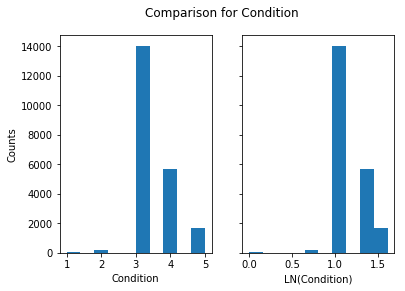

In [56]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['condition'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Condition")

# Second plot - log transformation
ax[1].hist(df_predictors['condition'].apply(np.log))
ax[1].set_xlabel("LN(Condition)")

plt.suptitle("Comparison for Condition")
plt.show()

The dimensionality of this variable is very low (only 5 values) and really only 3 values show up most of the time. Therefore we might be better served also binarizing/treating it as categorical? We might also consider just binning the first 3 groups since so few observations for `1` and `2`.

#### 8. `grade`

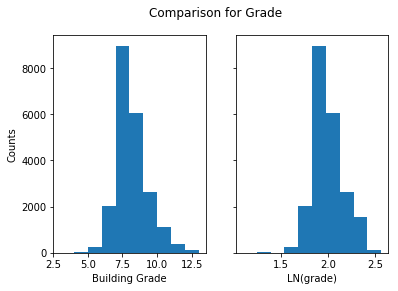

In [57]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['grade'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Building Grade")

# Second plot - log transformation
ax[1].hist(df_predictors['grade'].apply(np.log))
ax[1].set_xlabel("LN(grade)")

plt.suptitle("Comparison for Grade")
plt.show()

It already (at least to the eye test) seems pretty normal. So recommend leaving as is for now.

In [58]:
# Here's Werlindo's columns
w_cols = [col for col in df_predictors.columns][0:8]
w_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade']

---

# More data cleaning

After we analyzed our existing variables for potential to transformation/normalize/standardize, we arrived at a set of variables to do so with, as well as a few more data cleaning tasks.

In [157]:
df3 = df_predictors.copy()
df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date_formatted', '98001', '98002', '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98108',
       '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

#### `sqft_above`

In [158]:
df3['sqft_above_log'] = df3['sqft_above'].apply(np.log)
df3.loc[:,['sqft_above','sqft_above_log']].head()

sqft_above  sqft_above_log
0        1180        7.073270
1        2170        7.682482
2         770        6.646391
3        1050        6.956545
4        1680        7.426549

#### `sqft_living15`

In [159]:
df3['sqft_living15_log'] = df3['sqft_living15'].apply(np.log)
df3.loc[:,['sqft_living15','sqft_living15_log']].head()

sqft_living15  sqft_living15_log
0           1340           7.200425
1           1690           7.432484
2           2720           7.908387
3           1360           7.215240
4           1800           7.495542

#### `sqft_lot15`

In [160]:
df3['sqft_lot15_log'] = df3['sqft_lot15'].apply(np.log)
df3.loc[:,['sqft_lot15','sqft_lot15_log']].head()

sqft_lot15  sqft_lot15_log
0        5650        8.639411
1        7639        8.941022
2        8062        8.994917
3        5000        8.517193
4        7503        8.923058

#### `bedrooms`

In [161]:
df3['bedrooms_log'] = df3['bedrooms'].apply(np.log)
df3.loc[:,['bedrooms','bedrooms_log']].head()

bedrooms  bedrooms_log
0         3      1.098612
1         3      1.098612
2         2      0.693147
3         4      1.386294
4         3      1.098612

#### `bathrooms`

In [162]:
df3['bathrooms_log'] = df3['bathrooms'].apply(np.log)
df3.loc[:,['bathrooms','bathrooms_log']].head()

bathrooms  bathrooms_log
0       1.00       0.000000
1       2.25       0.810930
2       1.00       0.000000
3       3.00       1.098612
4       2.00       0.693147

#### `sqft_lot`

In [163]:
df3['sqft_lot_log'] = df3['sqft_lot'].apply(np.log)
df3.loc[:,['sqft_lot','sqft_lot_log']].head()

sqft_lot  sqft_lot_log
0      5650      8.639411
1      7242      8.887653
2     10000      9.210340
3      5000      8.517193
4      8080      8.997147

#### `floors`

In [164]:
floors_binarized = pd.get_dummies(df3['floors'],prefix="floors")

In [165]:
floors_binarized.head()


floors_1.0  floors_1.5  floors_2.0  floors_2.5  floors_3.0  floors_3.5
0           1           0           0           0           0           0
1           0           0           1           0           0           0
2           1           0           0           0           0           0
3           1           0           0           0           0           0
4           1           0           0           0           0           0

In [166]:
floors_binarized.shape

(21597, 6)

In [167]:
df3 = pd.concat([df3, floors_binarized], axis=1)

In [168]:
df3.head()

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  grade  \
0         3       1.00      5650     1.0         0.0   0.0          3      7   
1         3       2.25      7242     2.0         0.0   0.0          3      7   
2         2       1.00     10000     1.0         0.0   0.0          3      6   
3         4       3.00      5000     1.0         0.0   0.0          5      7   
4         3       2.00      8080     1.0         0.0   0.0          3      8   

   sqft_above  sqft_basement     ...      sqft_lot15_log  bedrooms_log  \
0        1180              0     ...            8.639411      1.098612   
1        2170            400     ...            8.941022      1.098612   
2         770              0     ...            8.994917      0.693147   
3        1050            910     ...            8.517193      1.386294   
4        1680              0     ...            8.923058      1.098612   

   bathrooms_log  sqft_lot_log  floors_1.0  floors_1.5 floors_2.0  floors_2.5  \
0       0.000000      8.639411           1           0          0           0   
1       0.810930      8.887653           0           0          1           0   
2       0.000000      9.210340           1           0          0           0   
3       1.098612      8.517193           1           0          0           0   
4       0.693147      8.997147           1           0          0           0   

   floors_3.0  floors_3.5  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  

[5 rows x 98 columns]

In [169]:
# Drop one of the binarized columns
df3.drop(['floors_3.5'], axis=1, inplace=True)

#### `waterfront`

In [170]:
waterfront_binarized = pd.get_dummies(df3['waterfront'],prefix="wf")

In [171]:
waterfront_binarized.head()


wf_0.0  wf_1.0
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0

In [172]:
waterfront_binarized.shape

(21597, 2)

In [173]:
df3 = pd.concat([df3, waterfront_binarized], axis=1)

In [174]:
df3.head()

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  grade  \
0         3       1.00      5650     1.0         0.0   0.0          3      7   
1         3       2.25      7242     2.0         0.0   0.0          3      7   
2         2       1.00     10000     1.0         0.0   0.0          3      6   
3         4       3.00      5000     1.0         0.0   0.0          5      7   
4         3       2.00      8080     1.0         0.0   0.0          3      8   

   sqft_above  sqft_basement   ...    bedrooms_log  bathrooms_log  \
0        1180              0   ...        1.098612       0.000000   
1        2170            400   ...        1.098612       0.810930   
2         770              0   ...        0.693147       0.000000   
3        1050            910   ...        1.386294       1.098612   
4        1680              0   ...        1.098612       0.693147   

   sqft_lot_log  floors_1.0  floors_1.5  floors_2.0 floors_2.5  floors_3.0  \
0      8.639411           1           0           0          0           0   
1      8.887653           0           0           1          0           0   
2      9.210340           1           0           0          0           0   
3      8.517193           1           0           0          0           0   
4      8.997147           1           0           0          0           0   

   wf_0.0  wf_1.0  
0       1       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 99 columns]

In [175]:
# Drop one of the binarized columns
df3.drop(['wf_1.0'], axis=1, inplace=True)

#### `view`

In [176]:
view_binarized = pd.get_dummies(df3['view'],prefix="view")

In [177]:
view_binarized.head()


view_0.0  view_1.0  view_2.0  view_3.0  view_4.0
0         1         0         0         0         0
1         1         0         0         0         0
2         1         0         0         0         0
3         1         0         0         0         0
4         1         0         0         0         0

In [178]:
view_binarized.shape

(21597, 5)

In [179]:
df3 = pd.concat([df3, view_binarized], axis=1)

In [180]:
df3.head()

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  grade  \
0         3       1.00      5650     1.0         0.0   0.0          3      7   
1         3       2.25      7242     2.0         0.0   0.0          3      7   
2         2       1.00     10000     1.0         0.0   0.0          3      6   
3         4       3.00      5000     1.0         0.0   0.0          5      7   
4         3       2.00      8080     1.0         0.0   0.0          3      8   

   sqft_above  sqft_basement    ...     floors_1.5  floors_2.0  floors_2.5  \
0        1180              0    ...              0           0           0   
1        2170            400    ...              0           1           0   
2         770              0    ...              0           0           0   
3        1050            910    ...              0           0           0   
4        1680              0    ...              0           0           0   

   floors_3.0  wf_0.0  view_0.0 view_1.0  view_2.0  view_3.0  view_4.0  
0           0       1         1        0         0         0         0  
1           0       1         1        0         0         0         0  
2           0       1         1        0         0         0         0  
3           0       1         1        0         0         0         0  
4           0       1         1        0         0         0         0  

[5 rows x 103 columns]

In [181]:
# Drop one of the binarized columns
df3.drop(['view_4.0'], axis=1, inplace=True)

#### `condition`

In [182]:
condition_binarized = pd.get_dummies(df3['condition'],prefix="cond")

In [183]:
condition_binarized.head()


cond_1  cond_2  cond_3  cond_4  cond_5
0       0       0       1       0       0
1       0       0       1       0       0
2       0       0       1       0       0
3       0       0       0       0       1
4       0       0       1       0       0

In [184]:
condition_binarized.shape

(21597, 5)

In [185]:
df3 = pd.concat([df3, condition_binarized], axis=1)

In [186]:
df3.head()

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  grade  \
0         3       1.00      5650     1.0         0.0   0.0          3      7   
1         3       2.25      7242     2.0         0.0   0.0          3      7   
2         2       1.00     10000     1.0         0.0   0.0          3      6   
3         4       3.00      5000     1.0         0.0   0.0          5      7   
4         3       2.00      8080     1.0         0.0   0.0          3      8   

   sqft_above  sqft_basement   ...    wf_0.0  view_0.0  view_1.0  view_2.0  \
0        1180              0   ...         1         1         0         0   
1        2170            400   ...         1         1         0         0   
2         770              0   ...         1         1         0         0   
3        1050            910   ...         1         1         0         0   
4        1680              0   ...         1         1         0         0   

   view_3.0  cond_1 cond_2  cond_3  cond_4  cond_5  
0         0       0      0       1       0       0  
1         0       0      0       1       0       0  
2         0       0      0       1       0       0  
3         0       0      0       0       0       1  
4         0       0      0       1       0       0  

[5 rows x 107 columns]

In [187]:
# Drop one of the binarized columns
df3.drop(['cond_5'], axis=1, inplace=True)

The following we concluded to not transform:  
- `sqft_basement`
- `yr_built`
- `yr_renovated`
- `lat`
- `long`
- `grade`

We have alot of variables!

In [188]:
# Show our variables to date
df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
       ...
       'floors_3.0', 'wf_0.0', 'view_0.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      dtype='object', length=106)

Since we did a few more transformations, we will do another instance of multicollinearity analysis.

#### Multicollinearity - Take 2

In [189]:
df3.drop(['waterfront','view','condition','floors'], axis=1, inplace=True)

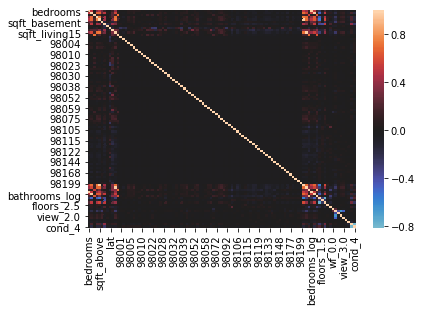

In [190]:
sns.heatmap(df3.corr(), center=0);

This heatmap is hard to interpret. It appears that zipcodes aren't outliers with respect to correlation, so we will reduce the columns to exclude them.

In [191]:
columns = [col for col in df3.columns]
columns

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'bedrooms_log',
 'bathrooms_log',
 'sqft_lot_log',
 'floors_1.0',
 

In [192]:
columns_keep = []
for col in columns:
    if not(col.startswith('98')):
        columns_keep.append(col)
columns_keep

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'bedrooms_log',
 'bathrooms_log',
 'sqft_lot_log',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'wf_0.0',
 'view_0.0',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'cond_1',
 'cond_2',
 'cond_3',
 'cond_4']

We forgot to drop the variables we binarized, we will do that now:

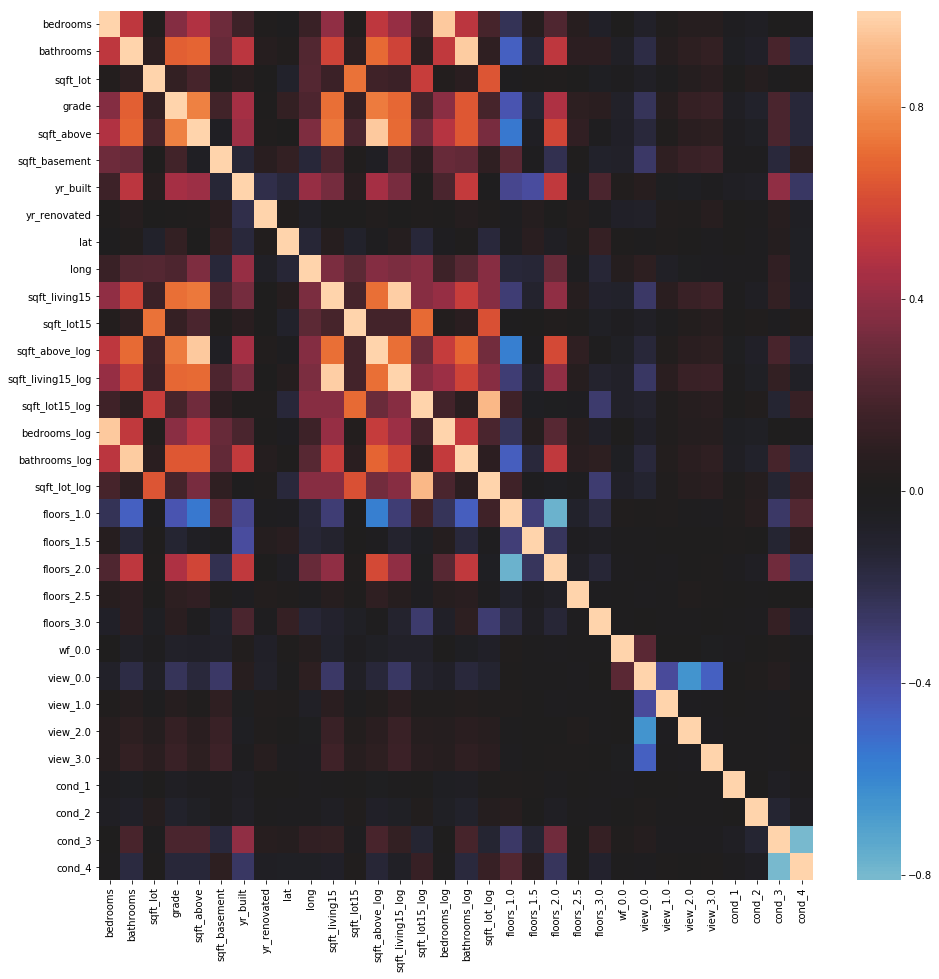

In [193]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df3.loc[:,columns_keep].corr(), center=0);

---

In [194]:
abs(df3.corr()) > 0.75

bedrooms  bathrooms  sqft_lot  grade  sqft_above  \
bedrooms               True      False     False  False       False   
bathrooms             False       True     False  False       False   
sqft_lot              False      False      True  False       False   
grade                 False      False     False   True        True   
sqft_above            False      False     False   True        True   
sqft_basement         False      False     False  False       False   
yr_built              False      False     False  False       False   
yr_renovated          False      False     False  False       False   
lat                   False      False     False  False       False   
long                  False      False     False  False       False   
sqft_living15         False      False     False  False       False   
sqft_lot15            False      False     False  False       False   
98001                 False      False     False  False       False   
98002                 False      False     False  False       False   
98003                 False      False     False  False       False   
98004                 False      False     False  False       False   
98005                 False      False     False  False       False   
98006                 False      False     False  False       False   
98007                 False      False     False  False       False   
98008                 False      False     False  False       False   
98010                 False      False     False  False       False   
98011                 False      False     False  False       False   
98014                 False      False     False  False       False   
98019                 False      False     False  False       False   
98022                 False      False     False  False       False   
98023                 False      False     False  False       False   
98024                 False      False     False  False       False   
98027                 False      False     False  False       False   
98028                 False      False     False  False       False   
98029                 False      False     False  False       False   
...                     ...        ...       ...    ...         ...   
98146                 False      False     False  False       False   
98148                 False      False     False  False       False   
98155                 False      False     False  False       False   
98166                 False      False     False  False       False   
98168                 False      False     False  False       False   
98177                 False      False     False  False       False   
98178                 False      False     False  False       False   
98188                 False      False     False  False       False   
98198                 False      False     False  False       False   
98199                 False      False     False  False       False   
sqft_above_log        False      False     False  False        True   
sqft_living15_log     False      False     False  False       False   
sqft_lot15_log        False      False     False  False       False   
bedrooms_log           True      False     False  False       False   
bathrooms_log         False       True     False  False       False   
sqft_lot_log          False      False     False  False       False   
floors_1.0            False      False     False  False       False   
floors_1.5            False      False     False  False       False   
floors_2.0            False      False     False  False       False   
floors_2.5            False      False     False  False       False   
floors_3.0            False      False     False  False       False   
wf_0.0                False      False     False  False       False   
view_0.0              False      False     False  False       False   
view_1.0              False      False     False  False       False   
view_2.0              False      False     

### Target Variable: Should we log transform `Price`?

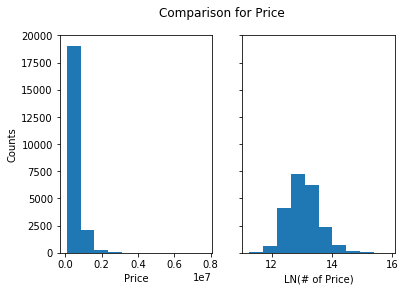

In [195]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df['price'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Price")

# Second plot - log transformation
ax[1].hist(df['price'].apply(np.log))
ax[1].set_xlabel("LN(# of Price)")

plt.suptitle("Comparison for Price")
plt.show()

It defintely looks more normal, so we will consider log transforming `Price` as one of our iterations.

## Digression: 
We want to save my results, so for now I will use a list of dictionaries

In [196]:
#I want to save results of all my modeling 

# Create a dictionary to hold a single model's results
def store_results_to_dict(model_name, model_desc, r2, r2_adj,cv_20_mean=np.nan,cv_20_std=np.nan):
    curr_dict = {'model_name':model_name
                 ,'model_desc':model_desc
                 ,'r2':r2
                 ,'r2_adj':r2_adj
                 ,'cv_20_mean':cv_20_mean
                 ,'cv_20_std':cv_20_std
                }
    return curr_dict

# Want to keep list of all result dictionaries
results = []

# Train/Test Split

Before running any modeling, we want to separate our data into `train` and `test` sets. We will train our models on `train` and do final validation on `test`.

In [198]:
y = df['price']
X = df3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [199]:
X_train.shape

(17277, 102)

# Model 1 - All Candidate Variables
### `Price` untransformed

We are going to start modeling to learn more above our variables! For this first run we are going to use ALL our variables.

In [200]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6458 to 20351
Columns: 102 entries, bedrooms to cond_4
dtypes: datetime64[ns](1), float64(10), int64(8), uint8(83)
memory usage: 4.0 MB


In [201]:
# Before we proceeed, let's remove `date_formatted`
X_train = X_train.drop(['date_formatted'], axis=1).copy()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6458 to 20351
Columns: 101 entries, bedrooms to cond_4
dtypes: float64(10), int64(8), uint8(83)
memory usage: 3.9 MB


In [202]:
# Set up predictors
predictors = sm.add_constant(X_train)

# Model SM LR model
model_1 = sm.OLS(y_train, predictors).fit()

# View Results
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     795.4
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:01:36   Log-Likelihood:            -2.3090e+05
No. Observations:               17277   AIC:                         4.620e+05
Df Residuals:                   17175   BIC:                         4.628e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.214e+07   6.66e+06     -4.827      0.000   -4.52e+07   -1.91e+07
bedrooms          -3.865e+04   4508.218     -8.572      0.000   -4.75e+04   -2.98e+04
bathrooms          1.668e+05   7905.147     21.104      0.000    1.51e+05    1.82e+05
sqft_lot              0.0232      0.048      0.486      0.627      -0.070       0.117
grade              6.125e+04   1991.569     30.755      0.000    5.73e+04    6.52e+04
sqft_above          265.0737      7.269     36.468      0.000     250.827     279.321
sqft_basement       115.6355      3.845     30.073      0.000     108.099     123.172
yr_built           -211.6003     76.866     -2.753      0.006    -362.265     -60.936
yr_renovated         25.0260      3.459      7.235      0.000      18.246      31.806
lat                2.346e+05   6.86e+04      3.422      0.001       1e+05    3.69e+05
long               -1.98e+05   4.92e+04     -4.027      0.000   -2.94e+05   -1.02e+05
sqft_living15        97.3956      9.865      9.873      0.000      78.059     116.732
sqft_lot15           -0.2838      0.082     -3.450      0.001      -0.445      -0.123
98001              -2.47e+05   2.89e+04     -8.546      0.000   -3.04e+05    -1.9e+05
98002             -2.143e+05   3.02e+04     -7.089      0.000   -2.74e+05   -1.55e+05
98003             -2.704e+05   2.86e+04     -9.439      0.000   -3.27e+05   -2.14e+05
98004              4.662e+05   1.72e+04     27.107      0.000    4.33e+05       5e+05
98005              -756.8680   2.07e+04     -0.037      0.971   -4.12e+04    3.97e+04
98006             -3.715e+04   1.89e+04     -1.961      0.050   -7.43e+04     -13.597
98007             -3.884e+04    2.2e+04     -1.769      0.077   -8.19e+04    4184.552
98008             -2.624e+04   1.99e+04     -1.319      0.187   -6.52e+04    1.27e+04
98010             -1.473e+05   3.48e+04     -4.228      0.000   -2.16e+05    -7.9e+04
98011             -2.086e+05   1.98e+04    -10.521      0.000   -2.47e+05    -1.7e+05
98014             -1.642e+05   3.18e+04     -5.159      0.000   -2.27e+05   -1.02e+05
98019             -1.977e+05   2.73e+04     -7.231      0.000   -2.51e+05   -1.44e+05
98022             -1.748e+05   3.88e+04     -4.504      0.000   -2.51e+05   -9.87e+04
98023             -2.949e+05   2.83e+04    -10.423      0.000    -3.5e+05   -2.39e+05
98024               -1.1e+05   3.24e+04     -3.392      0.001   -1.74e+05   -4.65e+04
98027             -8.965e+04   2.32e+04     -3.856      0.000   -1.35e+05   -4.41e+04
98028             -2.197e+05   1.76e+04    -12.481      0.000   -2.54e+05   -1.85e+05
98029             -3.646e+04   2.42e+04     -1.508      0.132   -8.38e+04    1.09e+04
98030             -2.338e+05   2.69e+04     -8.684      0.000   -2.87e+05   -1.81e+05
98031             -2.369e+05    2.5e+04     -9.467      0.000   -2.86e+05

From $R^2$ perspective this model appears to very good. There appears to be a number of insignificant variables, which is not surprising since we threw in **all** of our candidate variables.

## Cross Validation - Round 1

First, some setup for required libraries.

In [203]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [204]:
np.random.seed(1111)

In [206]:
linreg = LinearRegression()
X = X_train
y = y_train

In [207]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [208]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -24,486,933,040.21 (+/- 11,529,625,653.04)


In [209]:
results.append(store_results_to_dict('model_1','All preliminary variables included'
                                     ,model_1.rsquared, model_1.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [210]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965}]

# Model 2 - Removed insignificant variables from M.1
### `Price` untransformed


For this version we will drop all the columns that had `p-value > .05`.

In [211]:
# So one brute-force way to pare down this model is throw out variables that have high p-values.
drop_candidates = model_1.pvalues[model_1.pvalues > .05].reset_index()['index'].tolist()
drop_candidates

['sqft_lot',
 '98005',
 '98007',
 '98008',
 '98029',
 '98103',
 '98115',
 '98144',
 'sqft_lot15_log',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_3.0']

In [212]:
X_train_small = X_train.copy()

In [213]:
X_train_small.drop(drop_candidates,axis=1,inplace=True)

In [214]:
X_train_small.columns

Index(['bedrooms', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', '98001', '98002', '98003', '98004', '98006', '98010',
       '98011', '98014', '98019', '98022', '98023', '98024', '98027', '98028',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98105', '98106', '98108', '98109', '98112', '98116', '98117', '98118',
       '98119', '98122', '98125', '98126', '98133', '98136', '98146', '98148',
       '98155', '98166', '98168', '98177', '98178', '98188', '98198', '98199',
       'sqft_above_log', 'sqft_living15_log', 'bedrooms_log', 'bathrooms_log',
       'sqft_lot_log', 'floors_2.5', 'wf_0.0', 'view_0.0', 'view_1.0',
       'view_2.0', 'view_3.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      dtype

In [216]:
# Set up predictors
predictors = sm.add_constant(X_train_small)

# Model SM LR model
model_2 = sm.OLS(y_train, predictors).fit()

# View Results
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     910.0
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:05:14   Log-Likelihood:            -2.3093e+05
No. Observations:               17277   AIC:                         4.620e+05
Df Residuals:                   17188   BIC:                         4.627e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.178e+07   3.37e+06    -12.385      0.000   -4.84e+07   -3.52e+07
bedrooms          -3.928e+04   4505.355     -8.718      0.000   -4.81e+04   -3.04e+04
bathrooms          1.661e+05   7893.407     21.040      0.000    1.51e+05    1.82e+05
grade              6.096e+04   1990.414     30.629      0.000    5.71e+04    6.49e+04
sqft_above          262.6817      7.202     36.474      0.000     248.565     276.798
sqft_basement       120.8559      3.702     32.646      0.000     113.600     128.112
yr_built           -388.3923     70.317     -5.523      0.000    -526.220    -250.564
yr_renovated         22.8841      3.448      6.636      0.000      16.125      29.643
lat                3.204e+05   5.74e+04      5.580      0.000    2.08e+05    4.33e+05
long              -2.465e+05   2.91e+04     -8.478      0.000   -3.03e+05   -1.89e+05
sqft_living15        97.4558      9.836      9.908      0.000      78.177     116.735
sqft_lot15           -0.3373      0.059     -5.710      0.000      -0.453      -0.222
98001             -2.055e+05   2.19e+04     -9.396      0.000   -2.48e+05   -1.63e+05
98002             -1.689e+05   2.25e+04     -7.515      0.000   -2.13e+05   -1.25e+05
98003             -2.302e+05   2.25e+04    -10.249      0.000   -2.74e+05   -1.86e+05
98004              4.856e+05   1.05e+04     46.401      0.000    4.65e+05    5.06e+05
98006             -1.112e+04   9642.144     -1.153      0.249      -3e+04    7782.120
98010             -9.597e+04   2.33e+04     -4.117      0.000   -1.42e+05   -5.03e+04
98011             -2.019e+05    1.5e+04    -13.466      0.000   -2.31e+05   -1.72e+05
98014              -1.34e+05   2.02e+04     -6.638      0.000   -1.74e+05   -9.45e+04
98019             -1.795e+05    1.8e+04     -9.957      0.000   -2.15e+05   -1.44e+05
98022               -1.1e+05   2.53e+04     -4.344      0.000    -1.6e+05   -6.03e+04
98023             -2.563e+05   2.26e+04    -11.324      0.000   -3.01e+05   -2.12e+05
98024             -7.419e+04   2.17e+04     -3.418      0.001   -1.17e+05   -3.16e+04
98027             -5.628e+04   1.14e+04     -4.939      0.000   -7.86e+04   -3.39e+04
98028              -2.16e+05   1.29e+04    -16.761      0.000   -2.41e+05   -1.91e+05
98030             -1.927e+05   1.88e+04    -10.255      0.000    -2.3e+05   -1.56e+05
98031             -1.992e+05    1.7e+04    -11.702      0.000   -2.33e+05   -1.66e+05
98032              -2.38e+05   2.25e+04    -10.596      0.000   -2.82e+05   -1.94e+05
98033              5.934e+04   9642.628      6.154      0.000    4.04e+04    7.82e+04
98034             -1.161e+05   9848.990    -11.784      0.000   -1.35e+05   -9.68e+04
98038             -1.253e+05   1.57e+04     -7.980      0.000   -1.56e+05   -9.46e+04
98039              9.031e+05   2.44e+04     36.964      0.000    8.55e+05

So, the model is very slightly worse from the perspective or $R^2_{adj}$ performance (.823 vs .824 for the prior model). But it is a simpler model in that it has 15 less variables!

## Cross Validation - Round 2

In [223]:
linreg = LinearRegression()
X = X_train_small
y = y_train

In [224]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [225]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -24,536,003,704.29 (+/- 11,593,733,456.76)


In [226]:
results.append(store_results_to_dict('model_2','Model 1 with >.05 p-value variables removed'
                                     ,model_2.rsquared, model_2.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [227]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006}]

# Model 3 - Log transformed `Price`

### Combine Model 2 with log-transformed `Price`

In [228]:
# Set up predictors
predictors = sm.add_constant(X_train_small)

# Model SM LR model
model_3 = sm.OLS(np.log(y_train), predictors).fit()

# View Results
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:08:29   Log-Likelihood:                 5077.8
No. Observations:               17277   AIC:                            -9978.
Df Residuals:                   17188   BIC:                            -9287.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -90.5870      3.941    -22.988      0.000     -98.311     -82.863
bedrooms             -0.0204      0.005     -3.885      0.000      -0.031      -0.010
bathrooms             0.0055      0.009      0.597      0.551      -0.013       0.024
grade                 0.0880      0.002     37.869      0.000       0.083       0.093
sqft_above            0.0001   8.41e-06     13.171      0.000    9.43e-05       0.000
sqft_basement         0.0001   4.32e-06     30.716      0.000       0.000       0.000
yr_built             -0.0003   8.21e-05     -4.018      0.000      -0.000      -0.000
yr_renovated       3.261e-05   4.03e-06      8.096      0.000    2.47e-05    4.05e-05
lat                   0.7914      0.067     11.798      0.000       0.660       0.923
long                 -0.5173      0.034    -15.233      0.000      -0.584      -0.451
sqft_living15      -2.73e-05   1.15e-05     -2.376      0.018   -4.98e-05   -4.78e-06
sqft_lot15        -8.831e-08    6.9e-08     -1.280      0.201   -2.24e-07     4.7e-08
98001                -0.5180      0.026    -20.275      0.000      -0.568      -0.468
98002                -0.4972      0.026    -18.934      0.000      -0.549      -0.446
98003                -0.5272      0.026    -20.093      0.000      -0.579      -0.476
98004                 0.3964      0.012     32.431      0.000       0.372       0.420
98006                -0.0255      0.011     -2.260      0.024      -0.048      -0.003
98010                -0.1659      0.027     -6.092      0.000      -0.219      -0.113
98011                -0.4023      0.018    -22.972      0.000      -0.437      -0.368
98014                -0.3033      0.024    -12.860      0.000      -0.350      -0.257
98019                -0.3978      0.021    -18.887      0.000      -0.439      -0.357
98022                -0.2571      0.030     -8.696      0.000      -0.315      -0.199
98023                -0.5886      0.026    -22.258      0.000      -0.640      -0.537
98024                -0.1244      0.025     -4.904      0.000      -0.174      -0.075
98027                -0.0672      0.013     -5.047      0.000      -0.093      -0.041
98028                -0.4468      0.015    -29.685      0.000      -0.476      -0.417
98030                -0.4765      0.022    -21.707      0.000      -0.520      -0.433
98031                -0.4910      0.020    -24.691      0.000      -0.530      -0.452
98032                -0.5985      0.026    -22.804      0.000      -0.650      -0.547
98033                 0.0114      0.011      1.013      0.311      -0.011       0.033
98034                -0.2717      0.012    -23.612      0.000      -0.294      -0.249
98038                -0.2896      0.018    -15.785      0.000      -0.326      -0.254
98039                 0.5076      0.029     17.783      0.000       0.452

$R^2$ is noticeably higher at `.883` vs `.823` in **Model 2**!

## Cross Validation - Round 3

In [229]:
linreg = LinearRegression()
X = X_train_small
y = np.log(y_train)

In [230]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [231]:
print("Accuracy: {:,.4f} (+/- {:,.4f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.0330 (+/- 0.0048)


In [232]:
results.append(store_results_to_dict('model_3'
                                     ,'Model 2 with log-transformed Price'
                                     ,model_3.rsquared, model_3.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [233]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296}]

Woah. Because we transformed our target variable, the scale of our mean squared error also changed. So it's going to be hard to compare `Model 3` to `Models 1 and 2`. But we should be able still compare version's of the model that use the same version of the target variable (non-transformed vs log-transformed).

# Model 4 - All variables, log-transformed `price`

For completeness, we will also document a model with all variables, but with `price` log-transformed.

In [234]:
# Set up predictors
predictors = sm.add_constant(X_train)

# Model SM LR model
model_4 = sm.OLS(np.log(y_train), predictors).fit()

# View Results
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:10:31   Log-Likelihood:                 5163.3
No. Observations:               17277   AIC:                        -1.012e+04
Df Residuals:                   17175   BIC:                            -9331.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -62.6003      7.753     -8.074      0.000     -77.797     -47.404
bedrooms             -0.0206      0.005     -3.919      0.000      -0.031      -0.010
bathrooms             0.0033      0.009      0.363      0.717      -0.015       0.021
sqft_lot           1.803e-07   5.55e-08      3.249      0.001    7.15e-08    2.89e-07
grade                 0.0883      0.002     38.060      0.000       0.084       0.093
sqft_above            0.0001   8.46e-06     12.965      0.000    9.31e-05       0.000
sqft_basement         0.0001   4.48e-06     28.936      0.000       0.000       0.000
yr_built           -8.31e-05   8.95e-05     -0.929      0.353      -0.000    9.23e-05
yr_renovated       3.535e-05   4.03e-06      8.776      0.000    2.75e-05    4.32e-05
lat                   0.5501      0.080      6.892      0.000       0.394       0.707
long                 -0.3794      0.057     -6.630      0.000      -0.492      -0.267
sqft_living15     -2.195e-05   1.15e-05     -1.911      0.056   -4.45e-05    5.68e-07
sqft_lot15        -7.379e-08   9.58e-08     -0.770      0.441   -2.62e-07    1.14e-07
98001                -0.6621      0.034    -19.672      0.000      -0.728      -0.596
98002                -0.6506      0.035    -18.486      0.000      -0.720      -0.582
98003                -0.6640      0.033    -19.908      0.000      -0.729      -0.599
98004                 0.3206      0.020     16.010      0.000       0.281       0.360
98005                -0.0728      0.024     -3.025      0.002      -0.120      -0.026
98006                -0.1259      0.022     -5.709      0.000      -0.169      -0.083
98007                -0.1309      0.026     -5.120      0.000      -0.181      -0.081
98008                -0.1220      0.023     -5.267      0.000      -0.167      -0.077
98010                -0.3376      0.041     -8.322      0.000      -0.417      -0.258
98011                -0.4486      0.023    -19.437      0.000      -0.494      -0.403
98014                -0.4179      0.037    -11.276      0.000      -0.491      -0.345
98019                -0.4816      0.032    -15.124      0.000      -0.544      -0.419
98022                -0.4659      0.045    -10.312      0.000      -0.554      -0.377
98023                -0.7206      0.033    -21.873      0.000      -0.785      -0.656
98024                -0.2536      0.038     -6.713      0.000      -0.328      -0.180
98027                -0.1912      0.027     -7.065      0.000      -0.244      -0.138
98028                -0.4860      0.020    -23.712      0.000      -0.526      -0.446
98029                -0.1092      0.028     -3.880      0.000      -0.164      -0.054
98030                -0.6196      0.031    -19.768      0.000      -0.681      -0.558
98031                -0.6249      0.029    -21.448      0.000      -0.682

It's resulting $R^2$ is similar to Model 3's. And its relationship to Model 3 is similar to that of Model 1's to Model 2's, i.e. slightly favorable.

## Cross Validation - Round 4

In [235]:
linreg = LinearRegression()
X = X_train
y = np.log(y_train)

In [236]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [237]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.00)


In [238]:
results.append(store_results_to_dict('model_4','All preliminary variables included, log-transformed price'
                                     ,model_4.rsquared
                                     ,model_4.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [239]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.88376497109

# Model 5 - Removed insignificant variables from M.4
### `Price` log-transformed


For this version we will drop all the columns that had `p-value > .05` in **Model 4**. 
To reiterate, Model 4 included all our original variables, but with the `price` log-transformed.

To put it yet another way, this model is to **Model 4** as **Model 2** is to **Model 1**.

In [240]:
# So one brute-force way to pare down this model is throw out variables that have high p-values.
drop_candidates = model_4.pvalues[model_4.pvalues > .05].reset_index()['index'].tolist()
drop_candidates

['bathrooms',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 '98103',
 '98122',
 '98199',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0']

In [241]:
X_train_small_log = X_train.copy()

In [242]:
X_train_small_log.drop(drop_candidates,axis=1,inplace=True)

In [243]:
X_train_small_log.columns

Index(['bedrooms', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'long', '98001', '98002', '98003', '98004',
       '98005', '98006', '98007', '98008', '98010', '98011', '98014', '98019',
       '98022', '98023', '98024', '98027', '98028', '98029', '98030', '98031',
       '98032', '98033', '98034', '98038', '98039', '98040', '98042', '98045',
       '98052', '98053', '98055', '98056', '98058', '98059', '98065', '98070',
       '98072', '98074', '98075', '98077', '98092', '98102', '98105', '98106',
       '98108', '98109', '98112', '98115', '98116', '98117', '98118', '98119',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', 'sqft_above_log',
       'sqft_living15_log', 'sqft_lot15_log', 'bedrooms_log', 'bathrooms_log',
       'sqft_lot_log', 'wf_0.0', 'view_0.0', 'view_1.0', 'view_2.0',
       'view_3.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      dtype='ob

In [244]:
# Set up predictors
predictors = sm.add_constant(X_train_small_log)

# Model SM LR model
model_5 = sm.OLS(y_train, predictors).fit()

# View Results
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     858.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:12:33   Log-Likelihood:            -2.3126e+05
No. Observations:               17277   AIC:                         4.627e+05
Df Residuals:                   17187   BIC:                         4.634e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -2.68e+07   6.22e+06     -4.306      0.000    -3.9e+07   -1.46e+07
bedrooms          -2.655e+04   4557.370     -5.826      0.000   -3.55e+04   -1.76e+04
sqft_lot             -0.1478      0.039     -3.749      0.000      -0.225      -0.071
grade              6.084e+04   1925.208     31.603      0.000    5.71e+04    6.46e+04
sqft_above          358.4071      6.071     59.035      0.000     346.507     370.307
sqft_basement       138.6512      3.713     37.339      0.000     131.373     145.930
yr_renovated         30.9932      3.366      9.209      0.000      24.396      37.590
lat                1.505e+05   6.56e+04      2.293      0.022    2.19e+04    2.79e+05
long              -1.836e+05   4.71e+04     -3.898      0.000   -2.76e+05   -9.13e+04
98001             -3.103e+05   2.51e+04    -12.369      0.000    -3.6e+05   -2.61e+05
98002             -2.607e+05   2.65e+04     -9.850      0.000   -3.13e+05   -2.09e+05
98003             -3.274e+05   2.51e+04    -13.065      0.000   -3.76e+05   -2.78e+05
98004               4.44e+05   1.32e+04     33.651      0.000    4.18e+05     4.7e+05
98005             -2.687e+04   1.74e+04     -1.548      0.122   -6.09e+04    7146.994
98006             -6.699e+04   1.45e+04     -4.621      0.000   -9.54e+04   -3.86e+04
98007             -7.579e+04   1.88e+04     -4.034      0.000   -1.13e+05    -3.9e+04
98008             -6.445e+04    1.6e+04     -4.028      0.000   -9.58e+04   -3.31e+04
98010             -2.153e+05    3.1e+04     -6.952      0.000   -2.76e+05   -1.55e+05
98011             -2.344e+05   1.71e+04    -13.724      0.000   -2.68e+05   -2.01e+05
98014             -2.067e+05   2.89e+04     -7.148      0.000   -2.63e+05    -1.5e+05
98019             -2.343e+05   2.45e+04     -9.551      0.000   -2.82e+05   -1.86e+05
98022             -2.476e+05   3.43e+04     -7.211      0.000   -3.15e+05    -1.8e+05
98023             -3.533e+05   2.47e+04    -14.281      0.000   -4.02e+05   -3.05e+05
98024             -1.524e+05   2.94e+04     -5.175      0.000    -2.1e+05   -9.47e+04
98027             -1.294e+05    1.9e+04     -6.805      0.000   -1.67e+05   -9.21e+04
98028             -2.449e+05   1.45e+04    -16.844      0.000   -2.73e+05   -2.16e+05
98029             -7.505e+04   2.01e+04     -3.727      0.000   -1.15e+05   -3.56e+04
98030             -2.931e+05   2.29e+04    -12.777      0.000   -3.38e+05   -2.48e+05
98031             -2.927e+05    2.1e+04    -13.936      0.000   -3.34e+05   -2.52e+05
98032             -3.253e+05   2.48e+04    -13.113      0.000   -3.74e+05   -2.77e+05
98033              1.878e+04   1.26e+04      1.485      0.138   -6009.979    4.36e+04
98034             -1.512e+05   1.24e+04    -12.232      0.000   -1.75e+05   -1.27e+05
98038              -2.38e+05   2.42e+04     -9.848      0.000   -2.85e+05

So this model is the worse so far. And we also see that certain variables are now insignificant, whereas they were not before. Maybe this is indication of uncaught multicollinearity?

## Cross Validation - Round 5

In [245]:
linreg = LinearRegression()
X = X_train_small_log
y = np.log(y_train)

In [246]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [247]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.00)


In [248]:
results.append(store_results_to_dict('model_5','Model 4 with >.05 p-value variables removed'
                                     ,model_5.rsquared, model_5.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [249]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.88376497109

In [267]:
df_model_results = pd.DataFrame(results)
df_model_results.head(20)

cv_20_mean     cv_20_std  \
0 -2.448693e+10  5.764813e+09   
1 -2.453600e+10  5.796867e+09   
2 -2.453600e+10  5.796867e+09   
3 -3.303425e-02  2.385547e-03   
4 -3.277706e-02  2.394126e-03   
5 -3.293408e-02  2.397252e-03   

                                          model_desc model_name        r2  \
0                 All preliminary variables included    model_1  0.823873   
1        Model 1 with >.05 p-value variables removed    model_2  0.823288   
2        Model 1 with >.05 p-value variables removed    model_2  0.823288   
3                 Model 2 with log-transformed Price    model_3  0.882608   
4  All preliminary variables included, log-transf...    model_4  0.883765   
5        Model 4 with >.05 p-value variables removed    model_5  0.816327   

     r2_adj  
0  0.822838  
1  0.822383  
2  0.822383  
3  0.882007  
4  0.883081  
5  0.815376

# Model 6 - Add new feature: Distance to Business Centers

We calculated straight-line distance to Business Centers using the Haversine formula and the provided `lat` and `long`. The reasoning behind this is that one reason we believe people tend to select their homes is based on proximity to their workplaces. We are assuming the following areas as Business Centers:

- Downtown Seattle (which we will proxy with Flatiron!)  
- Bellevue


In [250]:
# Flatiron's Lat/Long
flatiron_school = (47.6098, -122.336)

# Bellevue
bellevue = (47.6111636,-122.3729398)

# Create copy of our primary dataframe
df_distance = df.copy()

# Initialize list to store calculated distances, 
# then loop through df and calculate distance using Haversine formula
distance_keep = []
dist_belle = []

for index, row in df_distance.iterrows():
    distance_keep.append(haversine(flatiron_school, (row['lat'],row['long']) , unit='mi'))
    dist_belle.append(haversine(bellevue, (row['lat'],row['long']) , unit='mi'))
    
# Store distance in df
df_distance['miles_to_dt_sea'] = distance_keep
df_distance['miles_to_dt_belle'] = dist_belle

In [258]:
df_distance = df_distance.loc[:,['miles_to_dt_sea','miles_to_dt_belle']].copy()
df_distance.head()

miles_to_dt_sea  miles_to_dt_belle
0         7.744606           8.770690
1         7.723802           7.993244
2        10.064832          10.911701
3         6.698936           6.313183
4        13.562820          15.279537

In [265]:
df_x_train_dummy = pd.concat([X_train, df_distance], axis=1, join = 'inner')
df_x_train_dummy.head()


bedrooms  bathrooms  sqft_lot  grade  sqft_above  sqft_basement  \
6458         3        2.5    203860      9        3680              0   
9879         2        1.0      5393      6         980              0   
4519         3        1.5      3852      8        1670              0   
5955         3        4.0     31796     11        4160              0   
3641         3        2.0      6802      7        1230              0   

      yr_built  yr_renovated      lat     long        ...          view_0.0  \
6458      1994           0.0  47.6903 -121.929        ...                 1   
9879      1969           0.0  47.3674 -122.081        ...                 1   
4519      1928           0.0  47.6411 -122.371        ...                 0   
5955      1989           0.0  47.6635 -122.017        ...                 1   
3641      1940           0.0  47.6712 -122.279        ...                 1   

      view_1.0  view_2.0  view_3.0  cond_1  cond_2  cond_3  cond_4  \
6458         0         0         0       0       0       1       0   
9879         0         0         0       0       0       1       0   
4519         0         0         1       0       0       0       1   
5955         0         0         0       0       0       1       0   
3641         0         0         0       0       0       1       0   

      miles_to_dt_sea  miles_to_dt_belle  
6458        19.743537          21.374193  
9879        20.548674          21.666775  
4519         2.708017           2.070380  
5955        15.308186          16.961285  
3641         5.003881           6.027581  

[5 rows x 103 columns]

In [251]:
df_distance['miles_to_dt_sea'].head()

0     7.744606
1     7.723802
2    10.064832
3     6.698936
4    13.562820
Name: miles_to_dt_sea, dtype: float64

In [252]:
df_distance.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view        ...          yr_built  \
0      5650     1.0         0.0   0.0        ...              1955   
1      7242     2.0         0.0   0.0        ...              1951   
2     10000     1.0         0.0   0.0        ...              1933   
3      5000     1.0         0.0   0.0        ...              1965   
4      8080     1.0         0.0   0.0        ...              1987   

   yr_renovated  zipcode      lat     long  sqft_living15 sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340       5650   
1        1991.0    98125  47.7210 -122.319           1690       7639   
2           0.0    98028  47.7379 -122.233           2720       8062   
3           0.0    98136  47.5208 -122.393           1360       5000   
4           0.0    98074  47.6168 -122.045           1800       7503   

   date_formatted  miles_to_dt_sea  miles_to_dt_belle  
0      2014-10-13         7.744606           8.770690  
1      2014-12-09         7.723802           7.993244  
2      2015-02-25        10.064832          10.911701  
3      2014-12-09         6.698936           6.313183  
4      2015-02-18        13.562820          15.279537  

[5 rows x 24 columns]

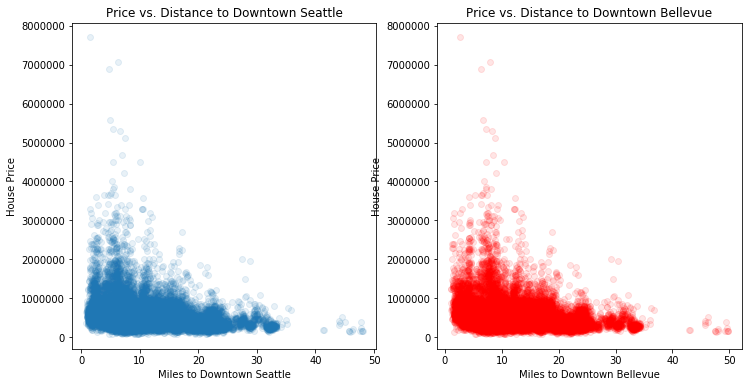

In [253]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(df_distance['miles_to_dt_sea'],df_distance['price'],alpha=0.1)
ax[0].set_title("Price vs. Distance to Downtown Seattle")
ax[0].set_xlabel("Miles to Downtown Seattle")
ax[0].set_ylabel("House Price")

ax[1].scatter(df_distance['miles_to_dt_belle'],df_distance['price'],alpha=0.1, color='red')
ax[1].set_title("Price vs. Distance to Downtown Bellevue")
ax[1].set_xlabel("Miles to Downtown Bellevue")
ax[1].set_ylabel("House Price")

plt.show()

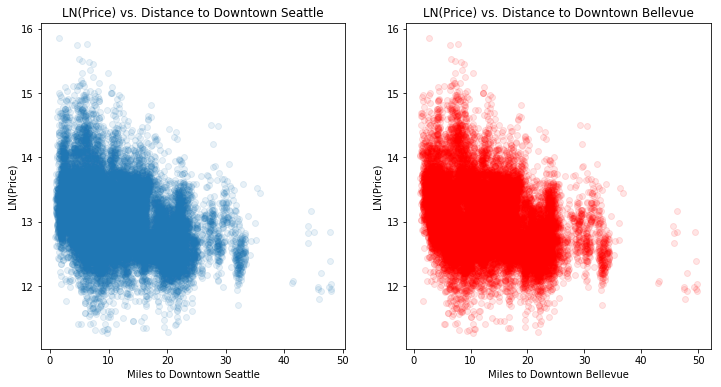

In [254]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(df_distance['miles_to_dt_sea'],np.log(df_distance['price']),alpha=0.1)
ax[0].set_title("LN(Price) vs. Distance to Downtown Seattle")
ax[0].set_xlabel("Miles to Downtown Seattle")
ax[0].set_ylabel("LN(Price)")

ax[1].scatter(df_distance['miles_to_dt_belle'],np.log(df_distance['price']),alpha=0.1, color = 'red')
ax[1].set_title("LN(Price) vs. Distance to Downtown Bellevue")
ax[1].set_xlabel("Miles to Downtown Bellevue")
ax[1].set_ylabel("LN(Price)")

plt.show()

## Model 6

We are performing training two un-trained columns(Distance from Seattle Downtown, Distance from Bellevue Downtown) with the existing model.

In [268]:
# Set up predictors
predictors = sm.add_constant(df_x_train_dummy)

# Model SM LR model
model_6 = sm.OLS(np.log(y_train), predictors).fit()

# View Results
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1302.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:40:28   Log-Likelihood:                 5369.9
No. Observations:               17277   AIC:                        -1.053e+04
Df Residuals:                   17173   BIC:                            -9725.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                95.5317     13.751      6.947      0.000      68.579     122.484
bedrooms             -0.0196      0.005     -3.782      0.000      -0.030      -0.009
bathrooms            -0.0004      0.009     -0.040      0.968      -0.018       0.017
sqft_lot           1.609e-07   5.48e-08      2.934      0.003    5.34e-08    2.68e-07
grade                 0.0867      0.002     37.771      0.000       0.082       0.091
sqft_above            0.0001   8.36e-06     12.988      0.000    9.22e-05       0.000
sqft_basement         0.0001   4.43e-06     29.005      0.000       0.000       0.000
yr_built           7.371e-05   8.89e-05      0.829      0.407      -0.000       0.000
yr_renovated       3.732e-05   3.98e-06      9.374      0.000    2.95e-05    4.51e-05
lat                  -0.0004      0.085     -0.005      0.996      -0.168       0.167
long                  0.7001      0.099      7.076      0.000       0.506       0.894
sqft_living15     -2.089e-05   1.14e-05     -1.841      0.066   -4.31e-05    1.35e-06
sqft_lot15          -1.4e-07   9.47e-08     -1.478      0.139   -3.26e-07    4.57e-08
98001                -0.4887      0.037    -13.137      0.000      -0.562      -0.416
98002                -0.5229      0.038    -13.709      0.000      -0.598      -0.448
98003                -0.4659      0.037    -12.542      0.000      -0.539      -0.393
98004                 0.1530      0.030      5.021      0.000       0.093       0.213
98005                -0.2323      0.033     -7.113      0.000      -0.296      -0.168
98006                -0.2908      0.030     -9.617      0.000      -0.350      -0.232
98007                -0.2849      0.033     -8.506      0.000      -0.351      -0.219
98008                -0.2674      0.031     -8.537      0.000      -0.329      -0.206
98010                -0.3337      0.042     -7.906      0.000      -0.416      -0.251
98011                -0.3781      0.029    -13.058      0.000      -0.435      -0.321
98014                -0.4363      0.040    -10.942      0.000      -0.514      -0.358
98019                -0.4487      0.036    -12.372      0.000      -0.520      -0.378
98022                -0.3179      0.047     -6.719      0.000      -0.411      -0.225
98023                -0.4508      0.038    -11.843      0.000      -0.525      -0.376
98024                -0.3556      0.041     -8.746      0.000      -0.435      -0.276
98027                -0.3236      0.032    -10.016      0.000      -0.387      -0.260
98028                -0.3980      0.026    -15.201      0.000      -0.449      -0.347
98029                -0.2376      0.033     -7.135      0.000      -0.303      -0.172
98030                -0.5912      0.034    -17.472      0.000      -0.658      -0.525
98031                -0.6449      0.032    -20.231      0.000      -0.707

Hurry!! It's resulting $R^2$= 0.887 is the best result model so far. And its relationship to Model 3 is similar to that of Model 4, i.e. slightly favorable.

## Cross Validation - Untrained columns

In [274]:
linreg = LinearRegression()
X = df_x_train_dummy
y = np.log(y_train)

In [270]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [271]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.00)


In [272]:
results.append(store_results_to_dict('model_6','Model 6 with the log transformed price, including all the variables and distance'
                                     ,model_6.rsquared, model_6.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [273]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.88376497109

## Model 7

Model 6 with removing features variables (p-values > 0.05)

In [275]:
# So one brute-force way to pare down this model is throw out variables that have high p-values.
drop_candidates = model_6.pvalues[model_6.pvalues > .05].reset_index()['index'].tolist()
drop_candidates

['bathrooms',
 'yr_built',
 'lat',
 'sqft_living15',
 'sqft_lot15',
 '98102',
 '98105',
 '98109',
 '98112',
 '98117',
 '98199',
 'bedrooms_log',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'miles_to_dt_belle']

In [276]:
X_train_dist_log = df_x_train_dummy.copy()

In [277]:
X_train_dist_log.drop(drop_candidates,axis=1,inplace=True)

In [278]:
X_train_dist_log.columns

Index(['bedrooms', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'long', '98001', '98002', '98003', '98004', '98005',
       '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
       '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
       '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052',
       '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072',
       '98074', '98075', '98077', '98092', '98103', '98106', '98108', '98115',
       '98116', '98118', '98119', '98122', '98125', '98126', '98133', '98136',
       '98144', '98146', '98148', '98155', '98166', '98168', '98177', '98178',
       '98188', '98198', 'sqft_above_log', 'sqft_living15_log',
       'sqft_lot15_log', 'bathrooms_log', 'sqft_lot_log', 'wf_0.0', 'view_0.0',
       'view_1.0', 'view_2.0', 'view_3.0', 'cond_1', 'cond_2', 'cond_3',
       'cond_4', 'miles_to_dt_sea'],
      dtype='object')

In [279]:
# Set up predictors
predictors = sm.add_constant(X_train_dist_log)

# Model SM LR model
model_7 = sm.OLS(y_train, predictors).fit()

# View Results
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     894.8
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:07:27   Log-Likelihood:            -2.3129e+05
No. Observations:               17277   AIC:                         4.628e+05
Df Residuals:                   17191   BIC:                         4.634e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.206e+08   6.44e+06     18.734      0.000    1.08e+08    1.33e+08
bedrooms          -1.302e+04   1710.101     -7.616      0.000   -1.64e+04   -9671.819
sqft_lot             -0.1750      0.039     -4.431      0.000      -0.252      -0.098
grade              6.145e+04   1925.446     31.914      0.000    5.77e+04    6.52e+04
sqft_above          349.3681      5.907     59.147      0.000     337.790     360.946
sqft_basement       138.5176      3.718     37.252      0.000     131.229     145.806
yr_renovated         31.5493      3.371      9.358      0.000      24.941      38.157
long               9.623e+05   5.26e+04     18.304      0.000    8.59e+05    1.07e+06
98001             -8.705e+04   1.86e+04     -4.679      0.000   -1.24e+05   -5.06e+04
98002             -9.027e+04   2.01e+04     -4.497      0.000    -1.3e+05   -5.09e+04
98003             -7.846e+04   1.93e+04     -4.075      0.000   -1.16e+05   -4.07e+04
98004              2.568e+05   1.28e+04     20.034      0.000    2.32e+05    2.82e+05
98005             -2.135e+05   1.69e+04    -12.607      0.000   -2.47e+05    -1.8e+05
98006             -2.453e+05    1.3e+04    -18.889      0.000   -2.71e+05    -2.2e+05
98007             -2.632e+05   1.84e+04    -14.306      0.000   -2.99e+05   -2.27e+05
98008             -2.485e+05   1.55e+04    -16.043      0.000   -2.79e+05   -2.18e+05
98010             -2.043e+05   2.64e+04     -7.743      0.000   -2.56e+05   -1.53e+05
98011              -2.61e+05   1.55e+04    -16.783      0.000   -2.91e+05    -2.3e+05
98014             -3.578e+05   2.84e+04    -12.588      0.000   -4.13e+05   -3.02e+05
98019             -3.411e+05   2.32e+04    -14.685      0.000   -3.87e+05   -2.96e+05
98022             -7.574e+04   2.75e+04     -2.757      0.006    -1.3e+05   -2.19e+04
98023             -2.771e+04   1.96e+04     -1.413      0.158   -6.61e+04    1.07e+04
98024              -3.25e+05   2.89e+04    -11.248      0.000   -3.82e+05   -2.68e+05
98027             -2.909e+05   1.73e+04    -16.850      0.000   -3.25e+05   -2.57e+05
98028             -2.456e+05    1.3e+04    -18.921      0.000   -2.71e+05    -2.2e+05
98029             -2.547e+05   1.92e+04    -13.270      0.000   -2.92e+05   -2.17e+05
98030             -2.325e+05    1.7e+04    -13.655      0.000   -2.66e+05   -1.99e+05
98031             -2.851e+05   1.56e+04    -18.239      0.000   -3.16e+05   -2.54e+05
98032             -1.983e+05   1.98e+04     -9.997      0.000   -2.37e+05   -1.59e+05
98033               -1.2e+05    1.2e+04    -10.015      0.000   -1.43e+05   -9.65e+04
98034             -2.281e+05    1.1e+04    -20.705      0.000    -2.5e+05   -2.06e+05
98038             -2.608e+05   1.91e+04    -13.685      0.000   -2.98e+05   -2.23e+05
98039              6.955e+05   2.57e+04     27.083      0.000    6.45e+05

So this model is also worse so far. And we also see that certain variables are now insignificant (Distance from Bellevue), whereas they were not before. Maybe this is indication of uncaught multicollinearity?

## Cross Validation - Round 7

In [280]:
linreg = LinearRegression()
X = X_train_dist_log
y = np.log(y_train)

In [281]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [282]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.00)


In [283]:
results.append(store_results_to_dict('model_7','Model 6 with the p-value variables > .05 removed'
                                     ,model_7.rsquared, model_7.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [284]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.88376497109

---

# IN PROGRESS BELOW

---

# Model 6 - Log transformed `Price` + Stepwise Selection

Here we will build on Model 3 by running it through a stepwise selection algorithm to see if it can determine a more 'optimized' subset of variables.


We will need a Stepwise Selection algorithm; we will just use the one from the textbook!

In [285]:
#import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

Let's see what the selected variables are!

In [286]:
sw_selected = stepwise_selection(df_x_train_dummy, np.log(y_train), verbose = True)

Add  sqft_basement                  with p-value 0.0
Add  sqft_living15_log              with p-value 0.0
Add  miles_to_dt_sea                with p-value 0.0
Add  long                           with p-value 0.0
Add  sqft_above_log                 with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 2.58676e-221
Add  lat                            with p-value 3.17966e-219
Add  wf_0.0                         with p-value 2.00534e-170
Add  98004                          with p-value 1.12159e-168
Add  view_0.0                       with p-value 8.86615e-121
Add  98168                          with p-value 5.78406e-107
Add  98178                          with p-value 4.4729e-97
Add  98022                          with p-value 7.68234e-94
Add  miles_to_dt_belle              with p-value 1.25456e-81
Add  98112                          with p-value 2.24548e-62
Add  98039                          with p-value 2.76751e-68
Add  9

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  cond_3                         with p-value 5.82958e-42
Add  sqft_above                     with p-value 1.4411e-38
Add  98105                          with p-value 4.85204e-33
Add  98030                          with p-value 8.60267e-33
Add  98198                          with p-value 1.76599e-35
Add  98032                          with p-value 6.15044e-35
Add  98115                          with p-value 1.46894e-30
Add  cond_2                         with p-value 3.52206e-30
Add  98117                          with p-value 1.38555e-29
Add  sqft_lot_log                   with p-value 4.49761e-30
Add  bathrooms_log                  with p-value 5.75186e-39
Add  98103                          with p-value 2.53557e-31
Add  cond_4                         with p-value 5.58308e-21
Add  cond_1                         with p-value 3.00985e-26
Add  98166                          with p-value 5.99489e-18
Add  yr_renovated                   with p-value 9.70368e-19
Add  98133               

In [287]:
len(sw_selected)

82

In [288]:
df_x_train_dummy.shape

(17277, 103)

In [289]:
X_train_dist_stepwise_log = df_x_train_dummy.loc[:,sw_selected]

In [292]:
X_train_dist_stepwise_log.columns
X_train_dist_stepwise_log.shape

(17277, 82)

In [293]:
# Set up predictors
predictors = sm.add_constant(X_train_dist_stepwise_log)

# Model SM LR model
model_8 = sm.OLS(np.log(y_train), predictors).fit()

# View Results
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1624.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:41:59   Log-Likelihood:                 5304.8
No. Observations:               17277   AIC:                        -1.044e+04
Df Residuals:                   17194   BIC:                            -9800.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.5804      9.034      8.920      0.000      62.873      98.287
sqft_basement         0.0001   4.33e-06     29.413      0.000       0.000       0.000
sqft_living15_log     0.1543      0.007     21.371      0.000       0.140       0.168
miles_to_dt_sea       0.0491      0.006      8.610      0.000       0.038       0.060
long                  0.6433      0.063     10.145      0.000       0.519       0.768
sqft_above_log        0.2182      0.014     16.085      0.000       0.192       0.245
grade                 0.0863      0.002     39.682      0.000       0.082       0.091
wf_0.0               -0.4176      0.020    -20.665      0.000      -0.457      -0.378
98004                 0.4115      0.013     32.742      0.000       0.387       0.436
view_0.0             -0.2896      0.014    -20.450      0.000      -0.317      -0.262
98168                -0.5636      0.014    -39.894      0.000      -0.591      -0.536
98178                -0.4756      0.014    -33.447      0.000      -0.503      -0.448
miles_to_dt_belle    -0.0806      0.006    -12.694      0.000      -0.093      -0.068
98112                 0.2737      0.014     19.487      0.000       0.246       0.301
98039                 0.5233      0.028     18.404      0.000       0.468       0.579
98040                 0.1605      0.014     11.727      0.000       0.134       0.187
98106                -0.3907      0.013    -29.765      0.000      -0.416      -0.365
sqft_lot           1.424e-07   4.52e-08      3.149      0.002    5.38e-08    2.31e-07
98055                -0.4065      0.014    -29.878      0.000      -0.433      -0.380
98033                 0.0904      0.011      8.368      0.000       0.069       0.112
98058                -0.3490      0.011    -31.285      0.000      -0.371      -0.327
98108                -0.3755      0.016    -23.467      0.000      -0.407      -0.344
98118                -0.2518      0.011    -21.907      0.000      -0.274      -0.229
98146                -0.3933      0.014    -27.494      0.000      -0.421      -0.365
98056                -0.3041      0.012    -26.041      0.000      -0.327      -0.281
98188                -0.4576      0.018    -25.191      0.000      -0.493      -0.422
98031                -0.3966      0.014    -27.828      0.000      -0.425      -0.369
98059                -0.2448      0.011    -22.556      0.000      -0.266      -0.224
98126                -0.2150      0.013    -16.186      0.000      -0.241      -0.189
98042                -0.3083      0.011    -27.620      0.000      -0.330      -0.286
cond_3               -0.1110      0.005    -20.448      0.000      -0.122      -0.100
sqft_above         9.818e-05   6.67e-06     14.727      0.000    8.51e-05       0.000
98105                 0.1837      0.014     13.154      0.000       0.156

It's resulting $R^2$= 0.886 is the best result model so far. And its relationship to Model 3 is similar to that of Model 4 and Model 6, i.e. slightly favorable.

## Cross Validation - Round 8

In [294]:
linreg = LinearRegression()
X = X_train_dist_stepwise_log
y = np.log(y_train)

In [295]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [296]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.00)


In [297]:
results.append(store_results_to_dict('model_8','Model 6 with step-wise selected variables'
                                     ,model_8.rsquared, model_8.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [298]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8238733891411094,
  'r2_adj': 0.8228376518661895,
  'cv_20_mean': -24486933040.213615,
  'cv_20_std': 5764812826.5177965},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8232875668160966,
  'r2_adj': 0.8223828254779431,
  'cv_20_mean': -24536003704.28847,
  'cv_20_std': 5796866728.379006},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8826079426116173,
  'r2_adj': 0.8820069127622935,
  'cv_20_mean': -0.033034253309575254,
  'cv_20_std': 0.0023855472981893296},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.88376497109

## Normality Check

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


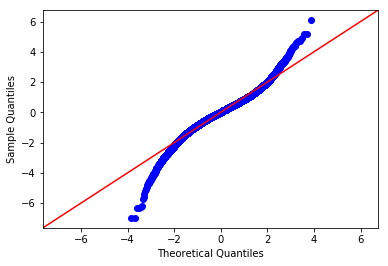

In [299]:
resid1 = model_8.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig.show()

Here `QQ-Plot` is looking good in the middle but the values at tail are inconsistent.

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


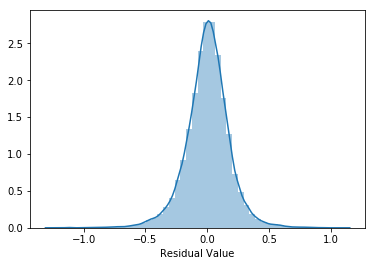

In [307]:
ax = sns.distplot(resid1, axlabel='Residual Value')
ax.set_title = 'Distribution Plot of Residuals'
ax.set_ylabel = 'Counts'




# Appendix

### Below is preliminary EDA on the dataset.

---

### Import Data

In [11]:
df = pd.read_csv('kc_house_data.csv')

We are going to divide and conquer doing detailed EDA on the variables. Hussein will do the first 11 and I will do the rest.

In [12]:
#Make sure there are 21 columns
df.shape

(21597, 21)

In [13]:
cols_eda_2 = [col for col in df.columns][11:]

In [10]:
cols_eda_2.append('price')

In [ ]:
1. sqft_above
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['sqft_above'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square Footage Above")

# Second plot - log transformation
ax[1].hist(df_predictors['sqft_above'].apply(np.log))
ax[1].set_xlabel("LN(Square Footage Above)")

plt.suptitle("Comparison for Square Footage")
plt.show()

2. sqft_basement
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['sqft_basement'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square Footage of Basement")

# Second plot - log transformation
ax[1].hist((df_predictors['sqft_basement']-min(df_predictors['sqft_basement']))/(max(df_predictors['sqft_basement'])-min(df_predictors['sqft_basement'])))
ax[1].set_xlabel("LN(Square Footage of Basement)")

plt.suptitle("Comparison for Square Footage of Basement")
plt.show()

3. yr_built
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['yr_built'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Year Built")

# Second plot - log transformation
ax[1].hist(df_predictors['yr_built'].apply(np.log))
ax[1].set_xlabel("LN(Year Built)")

plt.suptitle("Comparison for Year Built")
plt.show()

4. yr_renovated
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['yr_renovated'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Year Renovated")

# Second plot - log transformation
ax[1].hist((df_predictors['yr_renovated']-min(df_predictors['yr_renovated']))/(max(df_predictors['yr_renovated'])-min(df_predictors['yr_renovated'])))
ax[1].set_xlabel("LN(Year Renovated)")

plt.suptitle("Comparison for Year Renovated")
plt.show()

5. latitude
fig, ax = plt.subplots(1,2,sharey=True, figsize=(15,15))

# First plot - no transformation
ax[0].hist(df_predictors['lat'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Latitude")

# Second plot - log transformation
ax[1].hist(df_predictors['lat'].apply(np.log))
ax[1].set_xlabel("LN(Latitude)")

plt.suptitle("Comparison for Latitude")
plt.show()

6. Longitude
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['long'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Longitude")

# Second plot - log transformation
ax[1].hist((df_predictors['long']-min(df_predictors['long']))/(max(df_predictors['long'])-min(df_predictors['long'])))
ax[1].set_xlabel("LN(Longitude)")

plt.suptitle("Comparison for Longitude")
plt.show()

7. sqft_living15
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['sqft_living15'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square Footage Living_15")

# Second plot - log transformation
ax[1].hist(df_predictors['sqft_living15'].apply(np.log))
ax[1].set_xlabel("LN(Square Footage Living_15)")

plt.suptitle("Comparison for Square Footage Living_15")
plt.show()

8. sqft_lot15

fig, ax = plt.subplots(1,2,sharey=True,figsize=(10,10))

# First plot - no transformation
ax[0].hist(df_predictors['sqft_lot15'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square Footage_Lot15")

# Second plot - log transformation
ax[1].hist(df_predictors['sqft_lot15'].apply(np.log))
ax[1].set_xlabel("LN(Square Footage_Lot15)")

plt.suptitle("Comparison for Square Footage_Lot15")
plt.show()

In [14]:
# I also want price so can do scatter matrix
cols_eda_2.append('price')
cols_eda_2

['grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [15]:
# Now let's reduce down the dataset for convenience
df_eda_2 = df_half_2.loc[:,cols_eda_2]
df_eda_2.info()

NameError: name 'df_half_2' is not defined

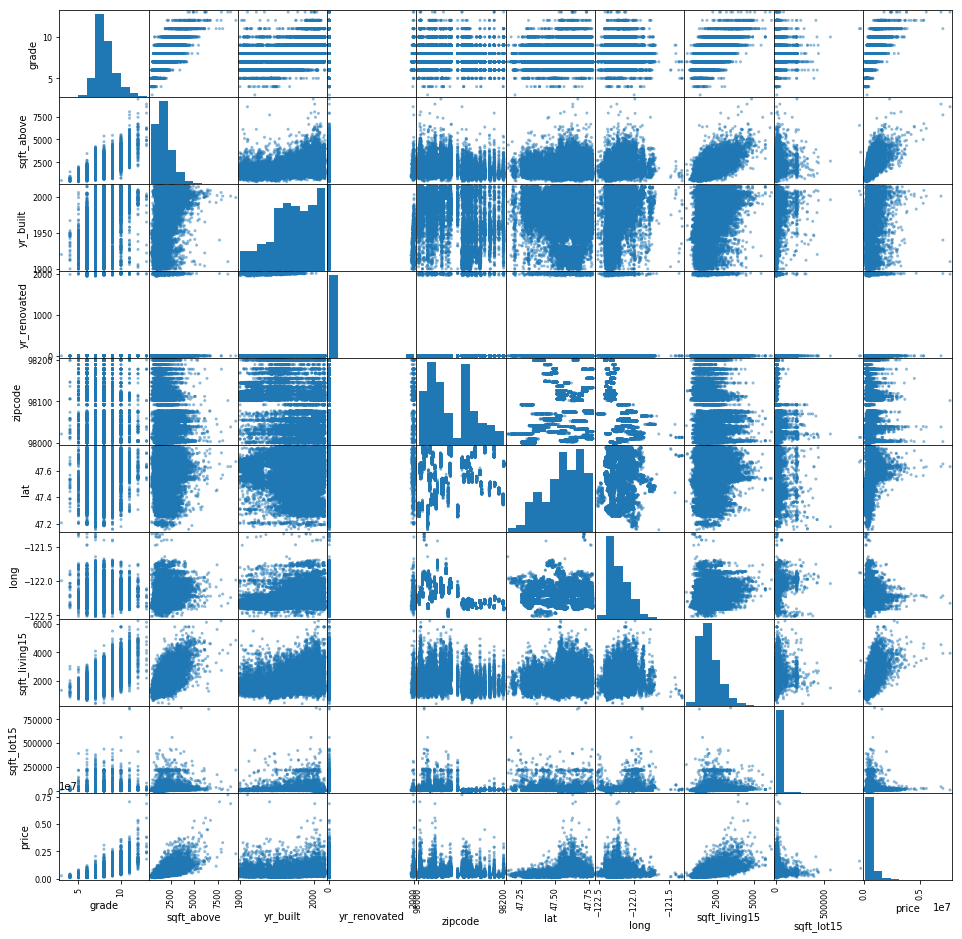

In [7]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2,figsize=(16,16))

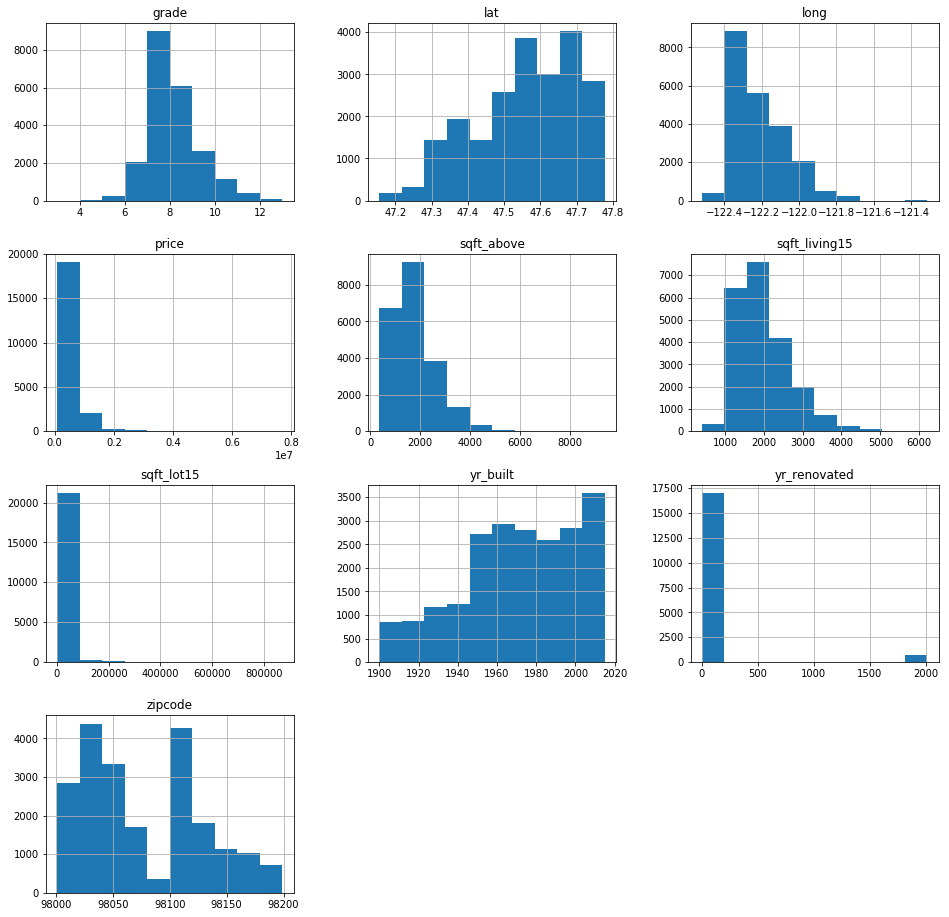

In [8]:
# Create histograms
_ = df_eda_2.hist(figsize=(16,16))

One last thing I might do is log transform price to see if that changes relationship with potential predictors.

In [9]:
df_eda_2['log_price'] = df_eda_2['price'].apply( np.log )

In [10]:
df_eda_2.head()

grade  sqft_above sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180           0.0      1955           0.0    98178  47.5112   
1      7        2170         400.0      1951        1991.0    98125  47.7210   
2      6         770           0.0      1933           NaN    98028  47.7379   
3      7        1050         910.0      1965           0.0    98136  47.5208   
4      8        1680           0.0      1987           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15     price  log_price  
0 -122.257           1340        5650  221900.0  12.309982  
1 -122.319           1690        7639  538000.0  13.195614  
2 -122.233           2720        8062  180000.0  12.100712  
3 -122.393           1360        5000  604000.0  13.311329  
4 -122.045           1800        7503  510000.0  13.142166

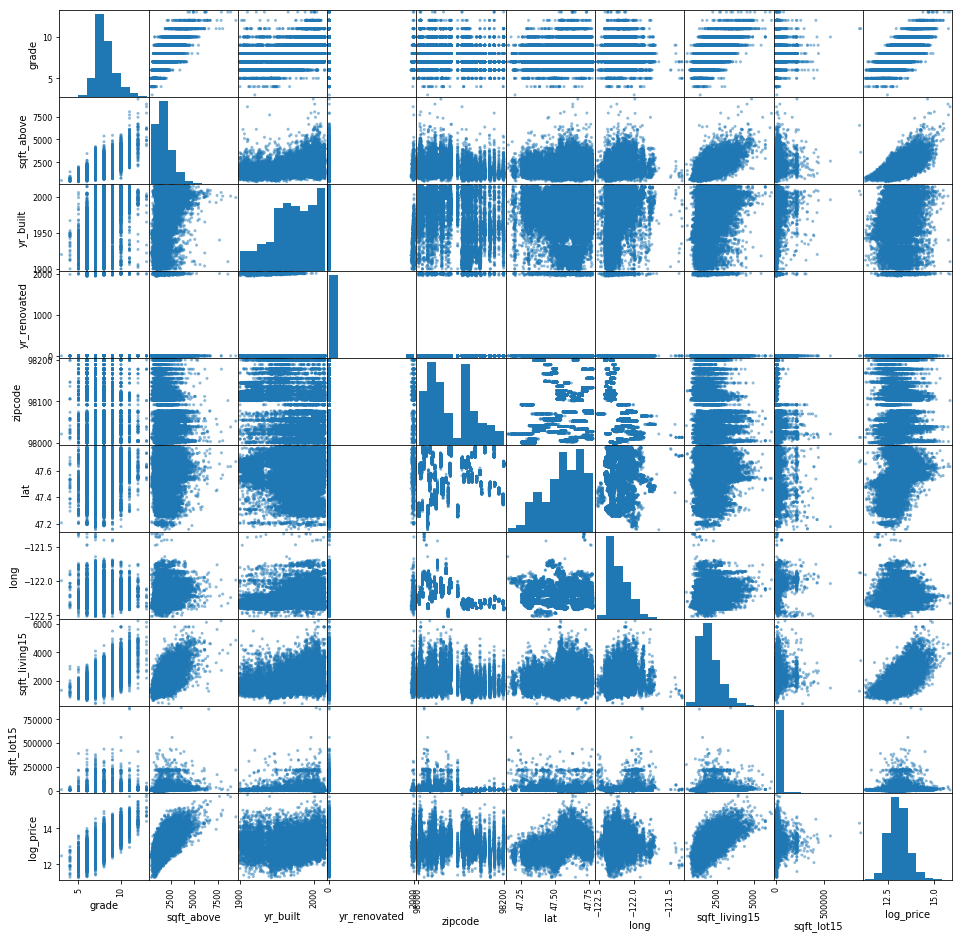

In [12]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2.drop(['price'],axis=1),figsize=(16,16))

When took the log of `price` it seems to show more linear realtions ships with many of my variables. So I think will recommend that we use `log_price` as our target variable.

### Initial observations and recommendations

- `grade` 
    - Appears to have linear relationship with, as well as being normally distributed 
    - No nulls
    - We confirmed that the King County scale is from 1-13.
    - <font color ="green">KEEP</font>
- `sqft_above`
    - No nulls
    - Appears to have linear relationship. Not normally distributed, but not sure if that's needed. 
    - <font color ="green">KEEP</font>
- `yr_built`
    - No nulls
    - After transformation of price it appears to have a linear relationship.
    - <font color ="green">KEEP</font>
- `sqft_basement`
    - Didn't get into the plots! Because it was an object. This was driven by `?` characters that were present in the column. Our initial idea is to transform it by assuming it is the difference between `sqft_totliving` and `sqft_above`. 
    - So we transformed the entire column by assuming as such:
            ` sqft_basement = sqft_totliving - sqft_above`
    - <font color ="red">NEED TO TRANSFORM</font>
- `yr_renovated`
    - There are a large number of nulls. We believe that it means that the house has not been renovated yet. There are also a large number with `0` entered, which we believe means the same thing. So for consistency of data we will transform the nulls all into `0`s.
    - <font color ="red">NEED TO TRANSFORM, replace `NaN` with 0</font>
- `zip code`
    - No nulls
    - But they are all `ints`. May need to scrub for zip+4. Also, think zip code should be considered to be more of a categorical variable. So think need to do two things:
    - 1. convert to `str`
    - 2. Truncate to 5 characters - (We confirmed it is!)
    - <font color ="red">NEED TO TRANSFORM</font>
- `lat` and `long`
    - No nulls
    - This appears to be very clean, with the caveat that some coordinates *may* fall out of King County.
    - <font color ="green">KEEP, but might want to see on a map</font>
- `sqft_living15`, `sqft_lot15`
    - No nulls
    - Distribution based on inspection of histogram seems reasonable.
    - <font color ="green">KEEP, for now</font>
    
    

        
    

---